Assignment 3 - Support Vector Machines

# Table of Contents:

# Assignment Questions:

**From what perspective are you conducting the analysis? (Who are you? / Who are you working for?):**
I am conducting this analysis as a data analyst working for a retail company that is interested in evaluating customer loyalty based on transaction behavior. The goal is to use machine learning to predict whether a customer will become a loyalty member based on their purchase data, such as Age, Quantity purchased, Purchase Frequency, and Customer Lifetime Value.

**What is your question?**
The primary question is: Can we accurately predict customer loyalty membership based on transaction behavior and customer segmentation?

**Describe your dataset(s) including URL (if available):**
URL: URL: https://www.kaggle.com/datasets/cameronseamons/electronic-sales-sep2023-sep2024

The dataset contains transaction-level information about customers' purchases in the retail sector. Key columns include:

- Customer ID: Unique identifier for each customer.
- Age: The age of the customer (numeric).
- Quantity: The number of items purchased (numeric).
- Customer_Lifetime_Value: The total amount of money a customer has spent. Created through feature engineering representing the total amount a customer has spent overall.
- Purchase_Frequency: The number of purchases a customer has made. A variable made by counting the total number of customer purchases during the dataset period.
- The **target variable** is Loyalty Member, a binary indicator representing whether the - customer is a loyalty member (Yes = 1, No = 0).


**What are your independent variable(s) and dependent variable(s)? Include variable type (binary, categorical, numeric):**
<u>Dependent Variable:</u>
Loyalty Member (binary: 0 = No, 1 = Yes)

<u>Independent Variables:</u>
Age (numeric)
Quantity (numeric)
Purchase_Frequency (numeric)
Customer_Lifetime_Value (numeric)

**How are your variables suitable for your analysis method?**
The selected features (age, quantity, purchase frequency, and customer lifetime value) provide numerical insights into customer behavior. Since SVM is suitable for binary classification and handles numerical features effectively, these variables are appropriate for predicting customer loyalty membership. The data was preprocessed with SMOTE to address class imbalance, and standard scaling was applied to normalize the data, which is important for SVM performance.

**What are your conclusions (include references to one or two CLEARLY INDICATED AND IMPORTANT graphs or tables in your output)?**

The model is moderately accurate in predicting loyalty membership but struggles with class 1 (Loyalty Member = Yes). It correctly classifies many non-loyalty members (class 0) but misclassifies many as loyalty members (high false positives).

Classification Report:
- Class 0 (Non-Loyalty Members): Precision = 0.78, Recall = 0.48, F1-Score = 0.59.
- Class 1 (Loyalty Members): Precision = 0.22, Recall = 0.51, F1-Score = 0.31.
- The recall for loyalty members (0.51) shows that the model identifies 51% of actual loyalty members, but precision is low (0.22), meaning it misclassifies many non-loyalty members as loyalty members.

<u>Accuracy: 0.49 (49%)</u>

The model's overall accuracy is moderate, but its performance is skewed toward correctly classifying non-loyalty members.

**What are your assumptions and limitations? What robustness checks did you perform or would you perform?**
Assumptions:
The transaction behavior variables (Age, Quantity, Purchase Frequency, and Customer Lifetime Value) are sufficient to predict customer loyalty membership.
The use of SMOTE effectively mitigates the class imbalance in the dataset.

Limitations:
The model's precision for predicting loyalty members is low (0.22), meaning it often incorrectly predicts non-loyalty members as loyalty members.
SVM might not capture complex relationships in the data, even with an RBF kernel.

Robustness Checks:
- Class Weight Tuning: I applied custom class weights (1:3) to give more emphasis to class 1 (Loyalty Member = Yes).
- Hyperparameter Tuning: Adjustments were made to the C parameter for regularization.
- Cross-Validation: I would recommend performing cross-validation to better evaluate the model’s performance across different splits of the dataset.

# Package Imports:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data:

In [2]:
file_path = "C:/Users/johne/Downloads/Electronic_sales_Sep2023-Sep2024.csv"
# Load the dataset
sales_data = pd.read_csv(file_path)

# Data Exploration: 



In [3]:
# Show missing data
missing_data = sales_data.isnull().sum()

# Show the first few rows of the data
data_head = sales_data.head()

# Show descriptive statistics of the data
data_statistics = sales_data.describe(include='all')

# Output the missing data, head of the data, and statistics
print("Missing Data:\n", missing_data)
print("\nHead of the Data:\n", data_head)
print("\nStatistics of the Data:\n", data_statistics)

Missing Data:
 Customer ID             0
Age                     0
Gender                  1
Loyalty Member          0
Product Type            0
SKU                     0
Rating                  0
Order Status            0
Payment Method          0
Total Price             0
Unit Price              0
Quantity                0
Purchase Date           0
Shipping Type           0
Add-ons Purchased    4868
Add-on Total            0
dtype: int64

Head of the Data:
    Customer ID  Age Gender Loyalty Member Product Type      SKU  Rating  \
0         1000   53   Male             No   Smartphone  SKU1004       2   
1         1000   53   Male             No       Tablet  SKU1002       3   
2         1002   41   Male             No       Laptop  SKU1005       3   
3         1002   41   Male            Yes   Smartphone  SKU1004       2   
4         1003   75   Male            Yes   Smartphone  SKU1001       5   

  Order Status Payment Method  Total Price  Unit Price  Quantity  \
0    Cancelled   

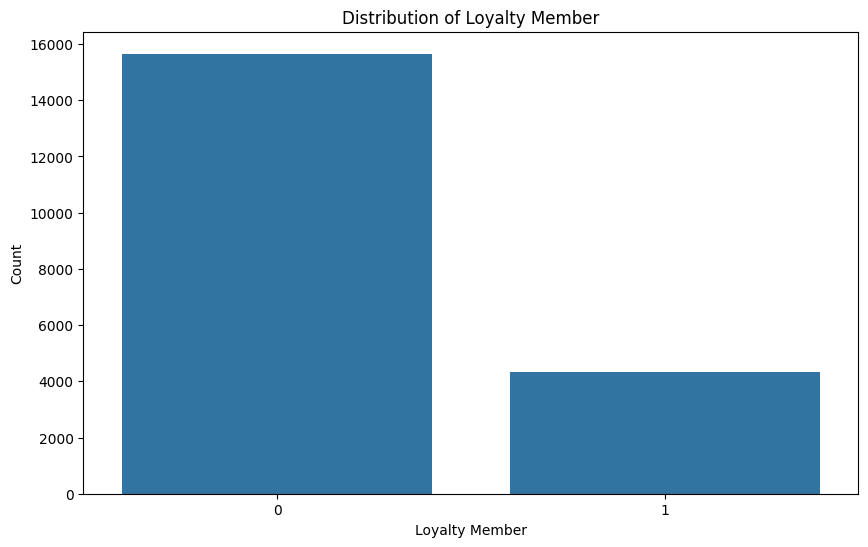

In [9]:
# Visualizing the distribution of 'Loyalty Member' before it has been converted to binary
plt.figure(figsize=(10, 6))
sns.countplot(data=sales_data, x='Loyalty Member')
plt.title('Distribution of Loyalty Member')
plt.xlabel('Loyalty Member')
plt.ylabel('Count')
plt.show()

- There is a large imbalance between classes in the target variable, this will need to be adjusted for and may have an effect on the final model output.

# Data Preprocessing:

In [4]:
# Implementing Customer Segmentation into the model
sales_data['Customer_Lifetime_Value'] = sales_data.groupby('Customer ID')['Total Price'].transform('sum')
sales_data['Purchase_Frequency'] = sales_data.groupby('Customer ID')['Customer ID'].transform('count')

# Create a binary outcome variable for loyalty membership ('Yes' -> 1, 'No' -> 0)
sales_data['Loyalty Member'] = sales_data['Loyalty Member'].apply(lambda x: 1 if x == 'Yes' else 0)

## Visuals on Pre-Processing:

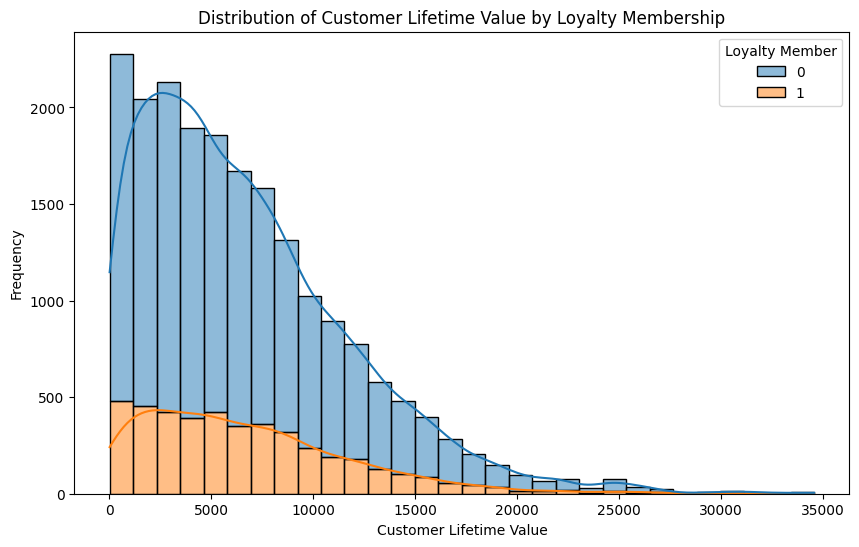

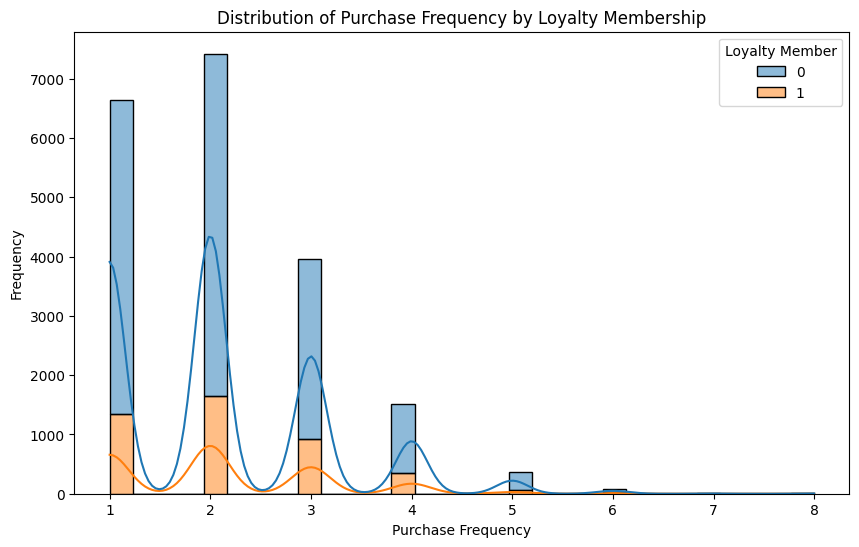

In [8]:
# Create a histogram for Customer_Lifetime_Value separated by 'Loyalty Member'
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_data, x='Customer_Lifetime_Value', hue='Loyalty Member', bins=30, kde=True, multiple='stack')
plt.title('Distribution of Customer Lifetime Value by Loyalty Membership')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for Purchase_Frequency separated by 'Loyalty Member'
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_data, x='Purchase_Frequency', hue='Loyalty Member', bins=30, kde=True, multiple='stack')
plt.title('Distribution of Purchase Frequency by Loyalty Membership')
plt.xlabel('Purchase Frequency')
plt.ylabel('Frequency')
plt.show()

# Training and Running Model:

In [5]:
# Select features
X = sales_data[['Age', 'Quantity', 'Purchase_Frequency', 'Customer_Lifetime_Value']]
y = sales_data['Loyalty Member']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_res_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVC model with RBF kernel, lower regularization (C), and limit iterations
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42, C=0.1, max_iter=5000)

# Train the model
svm_model.fit(X_train_res_scaled, y_train_res)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

c:\Users\johne\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# Evaluate and Visualize Model Performance:

Confusion Matrix:
 [[1495 1621]
 [ 430  454]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.48      0.59      3116
           1       0.22      0.51      0.31       884

    accuracy                           0.49      4000
   macro avg       0.50      0.50      0.45      4000
weighted avg       0.65      0.49      0.53      4000



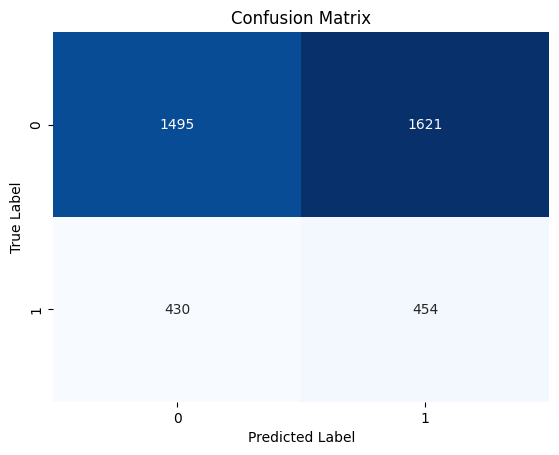

In [6]:
# Evaluate the model performance
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)

# Output the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Visualize the performance - Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()